In [2]:
import pysr

pysr.install(precompile=False)

[ Info: Julia version info


Julia Version 1.9.3
Commit bed2cd540a1 (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
      Ubuntu 22.04.3 LTS
  uname: Linux 5.15.0-91-generic #101-Ubuntu SMP Tue Nov 14 13:30:08 UTC 2023 x86_64 x86_64
  CPU: Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz: 
              speed         user         nice          sys         idle          irq
       #1  3600 MHz    1174756 s         85 s    1331588 s   14251524 s          0 s
       #2  1200 MHz    1520091 s         69 s    1717758 s   13526535 s          0 s
       #3  1821 MHz    1324629 s         74 s    1431132 s   14009980 s          0 s
       #4  1200 MHz     313695 s         84 s     234338 s   16209810 s          0 s
       #5  2500 MHz     883709 s         52 s    1001830 s   14878507 s          0 s
       #6  1200 MHz     171218 s         53 s     106283 s   16482005 s          0 s
       #7  3800 MHz     327109 s         47 s     299769 s   16136941 s      

[ Info: Julia executable: /opt/julia-1.9.3/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /usr/bin/python3
│     libpython: /usr/lib/x86_64-linux-gnu/libpython3.10.so.1.0
│ Python:
│     python: /usr/bin/python3
└     libpython: 
/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:208: UserWarning: Your system's Python library is static (e.g., conda), so precompilation will be turned off. For a dynamic library, try using `pyenv` and installing with `--enable-shared`: https://github.com/pyenv/pyenv/blob/master/plugins/python-build/README.md#building-with---enable-shared.
  warnings.warn(
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/pysr-0.16.3/Project.toml`
  No Changes to `~/.julia/environments/pysr-0.16.3/Manifest.toml`
/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:118: UserW

In [3]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split

# Introduction
To start the project first I am going to see to what extent PySR is capable by varying:
- seed
- error
- number of points


Let´s start with the function
$$ f(x)=113 \cdot e^{-2(x-1)^2 }$$
in which each point has a poisson distribution with average value $f(x)$


In [4]:
np.random.seed(0)
n = 3000
X = 6 * np.random.rand(n,2)-3
H = 113 * np.exp(-2 * (X[:, 0]-1) * (X[:, 0]-1))
y = np.random.poisson(H, n)

Let's vizualize our dataset:

Text(0, 0.5, '$y$')

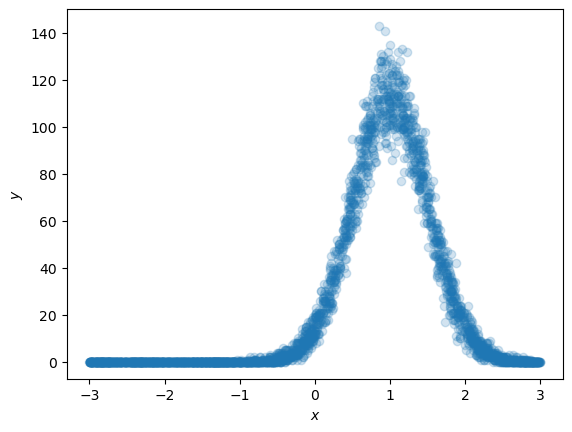

In [5]:
plt.scatter(X[:,0], y, alpha=0.2)
plt.xlabel("$x$")
plt.ylabel("$y$")

Starting our symbolic regression algorithm...

In [6]:
model = PySRRegressor(
    niterations=5,
    populations=100,
    binary_operators=["plus", "mult"],
    unary_operators=["exp"],
)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 8} will be ignored.
  warnings.warn(


Started!

Expressions evaluated per second: 3.720e+04
Head worker occupation: 0.9%
Progress: 75 / 500 total iterations (15.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.369e+03  1.594e+01  y = 23.599
4           1.323e+03  1.126e-02  y = (x₀ + exp(3.1622))
6           1.205e+03  4.701e-02  y = (exp(2.1523) * (2.1523 + x₀))
7           1.204e+03  6.595e-04  y = ((x₀ + exp(1.0961)) * exp(1.8577))
8           1.178e+03  2.156e-02  y = (exp(2.1378) * ((2.1378 + x₀) + 0.81852))
9           1.177e+03  1.124e-03  y = ((x₀ + exp(1.0961)) * (exp(2.0133) + 0.14957))
10          1.176e+03  7.420e-04  y = ((x₀ + exp(1.0961)) * (exp(2.0133) + exp(-1.1785)))
11          1.176e+03  2.386e-04  y = ((exp(1.5822) * (x₀ * 1.6374)) + exp(1.5842 + 1.5842))
13          1.030e+03  6.608e-02  y = (exp(exp(exp((-0.094159 * exp(x₀ * -1.0422)) + 0.29823))) ...
                        

┌ Warning: You are using multithreading mode, but only one thread is available. Try starting julia with `--threads=auto`.
└ @ SymbolicRegression ~/.julia/packages/SymbolicRegression/XKtla/src/SymbolicRegression.jl:546


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          23.598736   
	1        0.016883                                   (23.619955 + x0)   
	2        0.059171                      ((7.9663267 * x0) + 23.76936)   
	3        0.295135          exp(exp(exp(x0 * exp(x0 * -0.94059664))))   
	4        0.381864  exp(exp(exp(x0 * exp((-1.2238933 * x0) + 0.368...   
	5        0.178325  exp(exp(exp((-0.22539051 * (x0 + x0)) * (-1.91...   
	6        0.227181  exp(exp(exp((((-0.22539051 + -0.35709485) * 0....   
	7        0.058438  exp(exp(exp((-0.100374356 * (exp(x0 * 1.328057...   
	8  >>>>  0.626516  (exp(exp(exp((-0.1455052 * ((x0 + x0) + x0)) *...   
	
	          loss  complexity  
	0  1368.724000           1  
	1  1323.278000           3  
	2  1175.589100           5  
	3   361.038060           9  
	4   168.217040          11  
	5   140.742190          12  
	6    89.350624          14  
	7    84.278800          15  
	8    45.042843          16  
]

In [7]:
model.sympy()

x0 + exp(exp(exp(-0.4365156*x0*(x0 - 2.0222065))))

We can see that the equation of our regression looks nothing like the one we started with.

Two ideas follow:
- Increasing the complexity of the exponential operator;
- Increasing the number of points of our dataset;

This is a problem that has nothing to do with the seed nor with the error, as PySR is perfecly cpable of handling with a Poisson distribution.

Still, we can see that the curve adjusts somewhat well to our dataset. The only thing is that the expression is much uglier than the one we wanted to find.

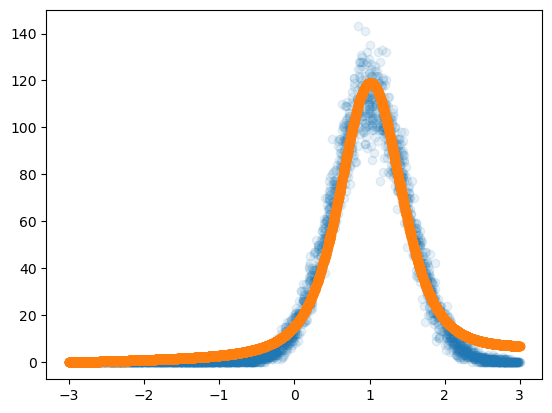

In [8]:
best_idx = model.equations_.query(
    f"loss < {2 * model.equations_.loss.min()}"
).score.idxmax()
model.sympy(best_idx)
plt.scatter(X[:, 0], y, alpha=0.1)
y_prediction = model.predict(X, index=best_idx)
plt.scatter(X[:, 0], y_prediction)

So let´s do the same thing, with another seed, but now with double the points in the dataset:

In [9]:
np.random.seed(1)
n = 6000
X = 6 * np.random.rand(n,2)-3
H = 113 * np.exp(-2 * X[:, 0] * X[:, 0])
y = np.random.poisson(H, n)

model = PySRRegressor(
    niterations=5,
    populations=100,
    binary_operators=["plus", "mult"],
    unary_operators=["exp"],
)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 8} will be ignored.
  warnings.warn(


In [ ]:
model.sympy()

110.722374581797*exp(-1.9920053*x0**2)

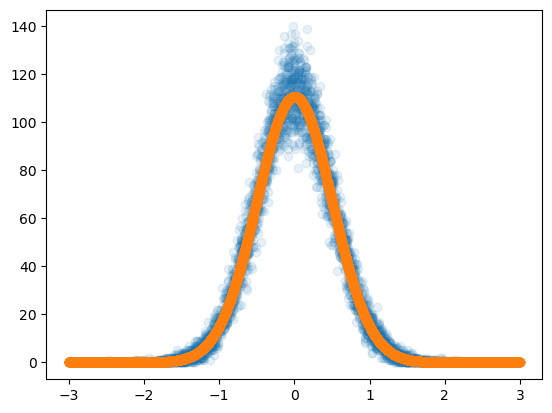

In [ ]:
best_idx = model.equations_.query(
    f"loss < {2 * model.equations_.loss.min()}"
).score.idxmax()
model.sympy(best_idx)
plt.scatter(X[:, 0], y, alpha=0.1)
y_prediction = model.predict(X, index=best_idx)
plt.scatter(X[:, 0], y_prediction)

The problem appears to be the same. Now let´s test with the same dataset but increasing the exponential's complexity.

In [ ]:
model = PySRRegressor(
    niterations=5,
    populations=100,
    binary_operators=["plus", "mult"],
    unary_operators=["exp"],
    complexity_of_operators={"exp": 2},
)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 8} will be ignored.
  warnings.warn(
┌ Warning: You are using multithreading mode, but only one thread is available. Try starting julia with `--threads=auto`.
└ @ SymbolicRegression ~/.julia/packages/SymbolicRegression/XKtla/src/SymbolicRegression.jl:546


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          24.187277   
	1        0.000047                    ((0.29564404 * x1) + 24.186918)   
	2        0.282176              (51.277508 + (-9.156729 * (x0 * x0)))   
	3  >>>>  0.830079  exp((((x0 * x0) + -1.0155956) + -1.6772952) * ...   
	4        0.026610  (exp((((x0 * x0) + -1.0155956) + -1.6772952) *...   
	5        0.041807  exp(((((x0 * (x0 * 1.160246)) + -0.4851888) + ...   
	6        0.019502  exp((((((x0 * x0) + (-1.012764 + -0.031809963)...   
	
	          loss  complexity  
	0  1393.326000           1  
	1  1393.065100           5  
	2   792.275700           7  
	3    28.634000          11  
	4    27.149918          13  
	5    24.972120          15  
	6    24.016872          17  
]

In [ ]:
model.sympy()

111.515680060943*exp(-1.7505965*x0**2)

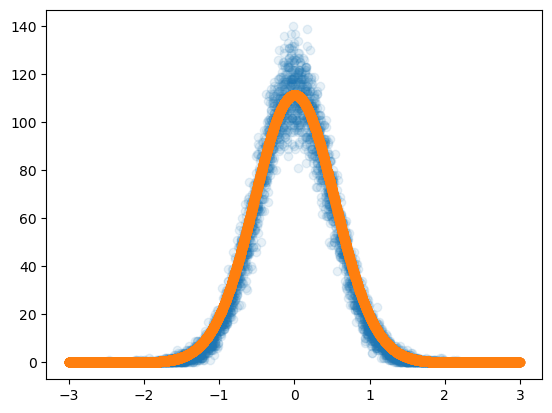

In [ ]:
best_idx = model.equations_.query(
    f"loss < {2 * model.equations_.loss.min()}"
).score.idxmax()
model.sympy(best_idx)
plt.scatter(X[:, 0], y, alpha=0.1)
y_prediction = model.predict(X, index=best_idx)
plt.scatter(X[:, 0], y_prediction)